Decision Tree

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
import random as rd

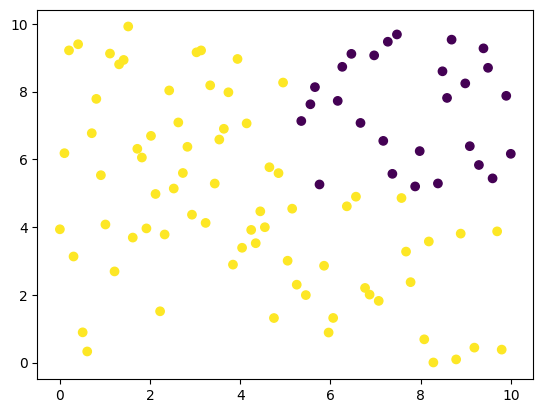

In [30]:
x = np.linspace(0, 10, 100)
y = np.random.rand(100)*10
points = {(x,y): 0 if y > 5 and x > 5 else 1 for x, y in zip(x, y)}
data = list(points.keys())
labels = list(points.values())
data = np.array(data)
labels = np.array(labels)
plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.show()

In [6]:
class node():
    def __init__(self, data, label):
        self.data = data
        self.label = label
        self.left = None
        self.right = None
        self.gini = None
    def set_left(self, left):
        self.left = left
    def set_right(self, right):
        self.right = right
    def set_gini(self, gini):
        self.gini = gini
    def get_data(self):
        return self.data
    def get_label(self):
        return self.label
    def get_left(self):
        return self.left
    def get_right(self):
        return self.right
    def get_gini(self):
        return self.gini

In [ ]:
class DecisionTree():
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.list_node = [node(data, label) for data, label in zip(data, labels)]
        self.root = None
        
    def calculate_gini(self):
        # tính tổng số phần tử
        total = len(self.labels)
        # lấy tập hợp các nhãn
        set_label = list(set(self.labels))
        # khởi tạo biến gini
        gini = 0
        for label in set_label:
            # tính tỉ lệ phần trăm của từng nhãn
            p = np.count_nonzero(self.labels==label)/total
            # cập nhật gini
            gini += p**2
        return 1 - gini
    
    def update_gini(self):
        for node in self.list_node:
            node.set_gini(node.calculate_gini())
            
    def set_root(self):
        list_gini = []
        for node in self.list_node:
            list_gini.append(node.get_gini())
        self.root = self.list_node[list_gini.index(min(list_gini))]
        
    def split(self,choosen_node):
        left = []
        right = []
        for node in self.list_node:
            if node.get_data() <= choosen_node.get_data():
                left.append(node)
            else:
                right.append(node)
        return left, right

    def train(self):
        self.update_gini()
        self.set_root()
        left, right = self.split(self.root)
        self.root.set_left(left.index(min(left)))
        self.root.set_right(right.index(min(right)))
        # còn tiếp, chưa code nốt do mình mới xét trường hợp x là 1 chiều
        
        

In [51]:
np.count_nonzero(labels == 0)

27